# Regresión polinómica: Predicción de Precio Casa según Tamaño

In [1]:
# 0. Importar librerías
%pip install mplcursors
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Note: you may need to restart the kernel to use updated packages.


Coeficiente de determinación (R^2): 1.00
Predicción del precio para una casa de 4500 pies cuadrados: 623.17 mil dólares


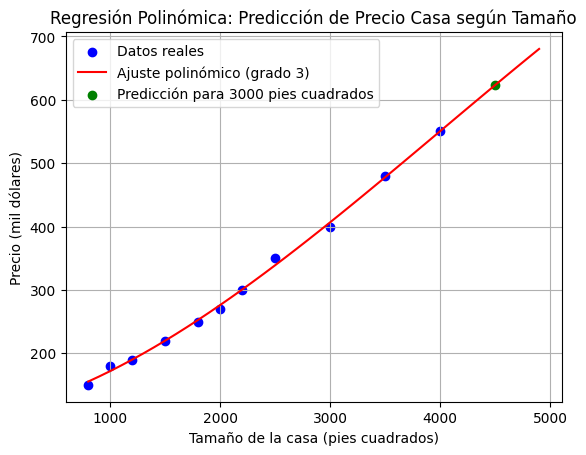

In [2]:
# 1. Simular datos reales (Tamaño casa en pies cuadrados y precio en miles de dólares)
np.random.seed(0)
X = np.array([800, 1000, 1200, 1500, 1800, 2000, 2200, 2500, 3000, 3500, 4000]).reshape(-1, 1)
y = np.array([150, 180, 190, 220, 250, 270, 300, 350, 400, 480, 550])

# 2. Crear características polinómicas (grado 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# 3. Ajustar el modelo de regresión polinómica
model = LinearRegression()
model.fit(X_poly, y)

r2 = r2_score(y, model.predict(X_poly))
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

# 5. Predecir para un nuevo valor de entrada (por ejemplo, una casa de 4500 pies cuadrados)
nuevo_tamano = np.array([[4500]])
nuevo_tamano_poly = poly_features.transform(nuevo_tamano)

# 6. Hacer la predicción
prediccion_precio = model.predict(nuevo_tamano_poly)
print(f"Predicción del precio para una casa de 4500 pies cuadrados: {prediccion_precio[0]:.2f} mil dólares")

# 7. Crear un rango de valores para predecir
X_range = np.arange(800, 5000, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred_range = model.predict(X_range_poly)

# 8. Graficar datos y predicción
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_range, y_pred_range, color='red', label='Ajuste polinómico (grado 3)')
plt.scatter(nuevo_tamano, prediccion_precio, color='green', label='Predicción para 3000 pies cuadrados')
plt.title("Regresión Polinómica: Predicción de Precio Casa según Tamaño")
plt.xlabel('Tamaño de la casa (pies cuadrados)')
plt.ylabel('Precio (mil dólares)')
plt.grid(True)
plt.legend()
cursor = mplcursors.cursor(hover=True)
plt.show()
